# Setup

In [ ]:
!pip install scanpy
!pip install numpy
!pip install pandas
!pip install -U matplotlib==3.2.0
!pip install AnnData
!pip install scanorama
!pip install wishbone_Dev
!pip install scprep

     |████████████████████████████████| 2.0 MB 7.4 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 96 kB 4.1 MB/s 
     |████████████████████████████████| 11.2 MB 41.9 MB/s 
     |████████████████████████████████| 900 kB 42.5 MB/s 
     |████████████████████████████████| 1.1 MB 27.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7e85fea51fdb83ee5382eb028c3b30fe73ec752ac76e33e8d0612f65d613a9eb
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=9cf0bcb31df25b9916fbd2c98e75d72c8ee2b496d6e517cbd57d9d76c9d36a86
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-no

     |████████████████████████████████| 12.4 MB 8.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 646 kB 7.2 MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391666 sha256=2474b70e663c956de68319b0f2417fa3c3812bc75dc0606b22dc2f5111d11073
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11375 sha256=4d9d3d0e0de0c81c70bb152a92a861a15fff2a0eae68799638ab4f9fcf284c62
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=46998aa399cc41e88776f7af489ac8fb9fc0e1f171e8bb0366ff93a710f5d9f9
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built annoy fbpca intervaltree
  Attempting uninstall: intervaltree
    Found existing installation: intervaltree 2.1.0
    Uninstalling

# Blattman E.coli annotation + data preprocessing

In [ ]:
blattman_ecoli = sc.read('/Blattman data/GSM4192509_394A_R2_trimmed_v4_v11_threshold_1_unfiltered_gene_matrix.txt', delimiter = '\t')
blattman_ecoli

AnnData object with n_obs × n_vars = 29548 × 2423

In [ ]:
express = []
for i in blattman_ecoli.obs_names:
    if 'none' in i:
        express.append('none')
    elif 'RFP' in i:
        express.append('RFP')
    elif 'GFP' in i:
        express.append('GFP')
blattman_ecoli.obs['express']= express
blattman_ecoli.obs  

,express
394A_bc1_10_bc2_10_bc3_79_none_0,none
394A_bc1_10_bc2_11_bc3_7_GFP_1,GFP
394A_bc1_10_bc2_12_bc3_14_none_2,none
394A_bc1_10_bc2_12_bc3_83_GFP_3,GFP
394A_bc1_10_bc2_14_bc3_23_none_4,none
...,...
394A_bc1_9_bc2_95_bc3_50_none_29543,none
394A_bc1_9_bc2_9_bc3_36_RFP_29544,RFP
394A_bc1_9_bc2_9_bc3_50_GFP_29545,GFP
394A_bc1_9_bc2_9_bc3_60_none_29546,none


In [ ]:
sc.pp.calculate_qc_metrics(blattman_ecoli, inplace= True)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_qc.py:422: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


In [ ]:
dense2 = blattman_ecoli.copy()

In [ ]:
dense2 = dense2[:,:2418]
sc.pp.filter_cells(dense2,min_counts=15)
sc.pp.filter_cells(dense2,max_counts = 2000)
sc.pp.filter_genes(dense2,min_cells = 5)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number


In [ ]:
pre_scVI_blatt = dense2.copy()

In [ ]:
sc.pp.normalize_total(dense2, inplace = True)
dense2.obs['cell_sum']=dense2.X.sum(axis=1)
dense2.obs['cell_sum']

394A_bc1_10_bc2_10_bc3_79_none_0       201.000031
394A_bc1_10_bc2_11_bc3_7_GFP_1         200.999985
394A_bc1_10_bc2_12_bc3_83_GFP_3        201.000015
394A_bc1_10_bc2_15_bc3_43_none_5       201.000000
394A_bc1_10_bc2_15_bc3_7_GFP_6         201.000000
                                          ...    
394A_bc1_9_bc2_95_bc3_37_none_29540    201.000000
394A_bc1_9_bc2_95_bc3_43_GFP_29541     201.000031
394A_bc1_9_bc2_9_bc3_36_RFP_29544      201.000000
394A_bc1_9_bc2_9_bc3_50_GFP_29545      201.000031
394A_bc1_9_bc2_9_bc3_84_none_29547     200.999985
Name: cell_sum, Length: 12255, dtype: float32

In [ ]:
sc.pp.log1p(dense2)
sc.pp.scale(dense2,max_value=10)

In [ ]:
dense2

AnnData object with n_obs × n_vars = 12255 × 1983
    obs: 'express', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'cell_sum'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mean', 'std'
    uns: 'log1p'

# Kuchina E.coli data annotation


*  Create Anndata with annotations from Kuchina files
*  Separate B.sub from E.coli data
*  Annotate E.coli gene names from preexisting database
*  Add annotations for E.coli gene names not in database using manually curated database





In [ ]:
bsub_ecoli_file = 'kushina_files/GSM4594094_M11_dcm.csv'
bsub_ecoli_barcodes_file = 'kushina_files/GSM4594094_M11_barcodes.csv'
bsub_ecoli_genes_file = 'kushina_files/GSM4594094_M11_genes.csv'

bsub_ecoli = sc.read_csv(bsub_ecoli_file, delimiter=',', first_column_names=None, dtype='float32')
barcodes = pd.read_csv(bsub_ecoli_barcodes_file,header=None)
genes = pd.read_csv(bsub_ecoli_genes_file,header=None)

bsub_ecoli.obs['barcodes'] = barcodes.to_numpy()
bsub_ecoli.var['genes'] = genes.to_numpy()

sc.pp.calculate_qc_metrics(bsub_ecoli, inplace= True)

In [ ]:
well = []
barcodes_np = barcodes.to_numpy();

for x in barcodes_np:
  if x[0][18] != '_':
    well.append(int(x[0][17:19]))
  else:
    well.append(int(x[0][17]))

well_num = np.array(well)
print(well_num)

heat_condition = np.where(well_num > 24,
                  'HS',
                  'None')
print(heat_condition)
bsub_ecoli.obs['heat_condition'] = heat_condition

[41 12  1 ... 12 35 21]
['HS' 'None' 'None' ... 'None' 'HS' 'None']


In [ ]:
strain = []
genes_np = genes.to_numpy();

for x in genes_np:
  strain.append(x[0][-5:])

strain_name = np.array(strain)
print(strain_name)

bsub_ecoli.var['strain_name'] = strain_name

# cell x gene
bsub_ecoli_copy = bsub_ecoli.copy()
bsub_ecoli_copy

['BSUBT' 'BSUBT' 'BSUBT' ... 'BSUBT' 'BSUBT' 'BSUBT']


AnnData object with n_obs × n_vars = 2682 × 7568
    obs: 'barcodes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'heat_condition'
    var: 'genes', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'strain_name'

In [ ]:
ecoli_kuchina = bsub_ecoli_copy[:,bsub_ecoli_copy.var['strain_name'] == 'ECOLI']

In [ ]:
# change file address if needed
ecoli_gene_identifiers_raw = np.loadtxt('/BMEN4480 Project/ecoli_identifier_mappings.txt', skiprows=1, delimiter="\t", unpack=False,dtype='str')

t = np.array([(g == 'Gene Name') for g in ecoli_gene_identifiers_raw[:,2]])
idx = [i for i, x in enumerate(t) if x]
select = np.in1d(range(ecoli_gene_identifiers_raw.shape[0]), idx )
ecoli_gene_identifiers = ecoli_gene_identifiers_raw[select,:]

# extracted gene names from mappings database
ecoli_gene_identifiers

array([['ER3413_4519', 'thrL', 'Gene Name'],
       ['ER3413_1', 'thrA', 'Gene Name'],
       ['ER3413_2', 'thrB', 'Gene Name'],
       ...,
       ['ER3413_4513', 'arcA', 'Gene Name'],
       ['ER3413_4541', 'yjjY', 'Gene Name'],
       ['ER3413_4514', 'yjtD', 'Gene Name']], dtype='<U18')

In [ ]:
# map gene names by their corresponding lotus tag
ecoli_genes = []
for g in ecoli_kuchina.var['genes']:
  g = g[:len(g) - 6]
  result = [x for i, x in enumerate(ecoli_gene_identifiers) if x[0] == g]
  gene_name = ''
  if len(result) == 0:
    gene_name = 'Unknown'
  else:
    gene_name = result[0][1]
  ecoli_genes.append(gene_name)

print(ecoli_genes)
print(sum('Unknown' in s for s in ecoli_genes)) #should be 191 for unfiltered e.coli cells 

ecoli_kuchina.var['gene_names'] = ecoli_genes

['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'rplC', 'Unknown', 'Unknown', 'Unknown', 'rpmF', 'raiA', 'Unknown', 'Unknown', 'Unknown', 'infC', 'Unknown', 'rplN', 'Unknown', 'rpsB', 'Unknown', 'rpsD', 'cspE', 'rpmD', 'rplO', 'rpsI', 'secY', 'ompA', 'rpsK', 'ompC', 'greA', 'rplB', 'yfeH', 'bolA', 'atpH', 'atpE', 'atpF', 'clpB', 'Unknown', 'Unknown', 'rstB', 'rplJ', 'mrcA', 'tpx', 'Unknown', 'Unknown', 'ackA', 'yadG', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'treC', 'rpoC', 'clpS', 'emrD', 'lpxD', 'hldE', 'Unknown', 'hisJ', 'Unknown', 'yhjJ', 'ptsH', 'smpB', 'Unknown', 'Unknown', 'Unknown', 'rpoB', 'fusA', 'tgt', 'trpA', 'pssA', 'rhlE', 'rplP', 'rplE', 'oppA', 'gnd', 'yoeB', 'yecF', 'rplW', 'gloA', 'frdC', 'rpmA', 'tufA', 'rseP', 'asnS', 'atpA', 'lpd', 'pitA', 'rpoA', 'fabG', 'Unknown', 'glmM', 'pspA', 'hemG', 'rseA', 'rplA', 'Unknown', 'alaS', 'Unknown', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  app.launch_new_instance()


In [ ]:
# map unknown gene names by their corresponding lotus tag using original database
ecoli_gene_unknown = pd.read_csv('/BMEN4480 Project/ecoli_kuchina_unknown_genes.csv')

for g in ecoli_kuchina.var[ecoli_kuchina.var['gene_names'] == 'Unknown']['genes']:

  result = ecoli_gene_unknown.loc[ecoli_gene_unknown['genes'] == g]
  gene_name = result['gene_names'].values[0]
  ecoli_kuchina.var['gene_names'][ecoli_kuchina.var['genes'] == g] = gene_name

ecoli_kuchina.var_names = ecoli_kuchina.var['gene_names']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ecoli_kuchina.obs_names = ecoli_kuchina.obs['barcodes']

# Kuchina E.Coli data preprocessing

Filtering cells & genes

*  Normalizing by mean count
*  Log transformation
*   Regressing out library size effects
*   Scaling


In [ ]:
# filter cells and genes
sc.pp.filter_cells(ecoli_kuchina, min_genes = 100)
print('Number of cells after min filter: {:d}'.format(ecoli_kuchina.n_obs))

sc.pp.filter_cells(ecoli_kuchina, min_counts = 100)
print('Number of cells after min filter: {:d}'.format(ecoli_kuchina.n_obs))

sc.pp.filter_genes(ecoli_kuchina, min_cells = 5)
print('Number of genes after min filter: {:d}'.format(ecoli_kuchina.n_vars))

Number of cells after min filter: 1063
Number of cells after min filter: 1063
Number of genes after min filter: 2692


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
# copy raw data that is not tranformed
pre_scVI_kuchina = ecoli_kuchina.copy()

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
mean_n_count = np.mean(ecoli_kuchina.obs["total_counts"])
print(mean_n_count)

sc.pp.normalize_total(ecoli_kuchina, target_sum=mean_n_count, copy=False)
print(ecoli_kuchina.X.sum(axis=1))

sc.pp.log1p(ecoli_kuchina)
sc.pp.regress_out(ecoli_kuchina, ['total_counts'])
sc.pp.scale(ecoli_kuchina, max_value=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


10860.798828125
[10860.799 10860.799 10860.8   ... 10860.8   10860.799 10860.799]


/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


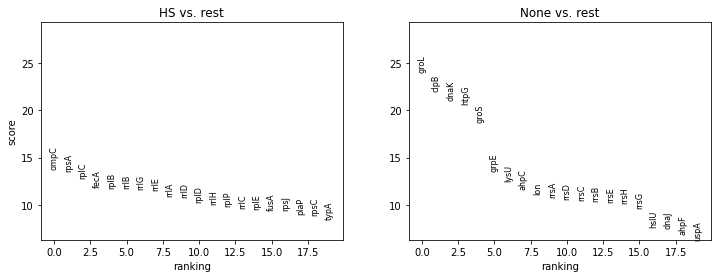

In [ ]:
sc.tl.rank_genes_groups(ecoli_kuchina, 'heat_condition', method='wilcoxon')
sc.pl.rank_genes_groups(ecoli_kuchina)

# Prepare & set expectations for dataset augmentation 

In [ ]:
pre_scVI_blatt = dense2

In [ ]:
pre_scVI_kuchina = ecoli_kuchina

In [ ]:
scVI_ecoli_kuchina = pre_scVI_kuchina
scVI_ecoli_blattman = pre_scVI_blatt

In [ ]:
kuchina_unique = set(scVI_ecoli_kuchina.var_names)
print("No of unique items in the kuchina list are:", len(kuchina_unique))

blattman_unique = set(scVI_ecoli_blattman.var_names)
print("No of unique items in the blattman list are:", len(blattman_unique))

No of unique items in the kuchina list are: 2659
No of unique items in the blattman list are: 1983


In [ ]:
overlap_genes = np.intersect1d(scVI_ecoli_kuchina.var_names,scVI_ecoli_blattman.var_names)
overlap_gene_num = len(overlap_genes)
print("No of overlapping genes between kuchina and blattman:", overlap_gene_num)
print("No of genes to append to the kuchina gene list are:", len(blattman_unique) - overlap_gene_num)
print("No of genes to append to the blattman gene list are:", len(kuchina_unique) - overlap_gene_num)
print("Final no of genes for each augmented dataset should be:", len(blattman_unique) + len(kuchina_unique) + overlap_gene_num)

No of overlapping genes between kuchina and blattman: 921
No of genes to append to the kuchina gene list are: 1062
No of genes to append to the blattman gene list are: 1738
Final no of genes for each augmented dataset should be: 5563


# Preparation of Kuchina E.Coli dataset for Expanded Scanorama
- Returns new_ecoli_kuchina
- Outputs zero-inflated dataset for Kuchina

In [ ]:
# concatenate count values for the same genes
scVI_ecoli_kuchina_df = pd.DataFrame(scVI_ecoli_kuchina.X, index=scVI_ecoli_kuchina.obs_names, columns=scVI_ecoli_kuchina.var_names).groupby(lambda x:x, axis=1).sum()
scVI_ecoli_kuchina_df

gene_names,aaeA,aaeB,aaeR,aas,aat,accA,accB,accC,accD,aceA,...,zntA,zntR,znuA,znuB,znuC,zraR,zraS,zupT,zur,zwf
barcodes,,,,,,,,,,,,,,,,,,,,,
AAACATCGAAGACGGA_1_20200401_M11_0510_K12_168,-0.099219,-0.039181,-0.072677,-0.137903,0.036700,-0.300907,-0.302858,-0.470373,-0.319706,-0.134895,...,-0.184922,-0.136220,-0.224087,-0.076951,-0.178533,-0.035219,-0.016595,-0.079390,-0.090781,-0.313740
AAACATCGCCGACAAC_8_20200401_M11_0510_K12_168,-0.097398,-0.056882,-0.099713,-0.141874,0.001057,-0.328953,-0.336296,-0.490469,-0.323138,-0.154508,...,-0.212587,-0.126570,-0.228145,-0.075151,-0.158995,-0.063090,-0.044597,-0.082667,-0.103435,-0.342404
AAACATCGCGCATACA_16_20200401_M11_0510_K12_168,-0.099469,-0.036754,-0.068971,-0.137358,0.041587,-0.297062,-0.298273,-0.467618,-0.319235,-0.132206,...,-0.181129,-0.137543,8.409600,-0.077198,-0.181212,-0.031398,-0.012756,-0.078940,-0.089046,-0.309810
AAACATCGTCTTCACA_31_20200401_M11_0510_K12_168,-0.097383,-0.057025,-0.099933,-0.141907,0.000767,3.097016,-0.336568,-0.490632,-0.323166,-0.154668,...,-0.212811,-0.126491,5.351695,-0.075137,-0.158836,-0.063316,-0.044824,-0.082694,-0.103538,-0.342637
AACAACCAACAGATTC_33_20200401_M11_0510_K12_168,-0.092624,-0.103278,-0.170579,-0.152285,-0.092371,-0.402469,-0.423945,0.925831,-0.332134,-0.205919,...,-0.285102,-0.101275,-0.238781,-0.070434,-0.107782,-0.136145,-0.117996,-0.091258,-0.136605,-0.417540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCACGCACCGACAAC_34_20200401_M11_0510_K12_168,-0.091084,-0.118244,-0.193439,-0.155643,-0.122508,-0.426183,1.238803,0.733918,1.447048,-0.222503,...,-0.308493,-0.093116,-0.242213,-0.068912,-0.091262,-0.159711,-0.141672,-0.094029,-0.147304,-0.441777
TTCACGCACCTAATCC_21_20200401_M11_0510_K12_168,-0.094064,-0.089286,-0.149208,-0.149146,-0.064196,-0.380299,-0.397513,-0.527258,-0.329421,-0.190415,...,2.991322,-0.108903,-0.235574,-0.071856,-0.123226,-0.114114,-0.095861,-0.088667,-0.126602,1.930678
TTCACGCACTAAGGTC_27_20200401_M11_0510_K12_168,-0.088884,-0.139627,-0.226099,-0.160441,-0.165567,-0.460064,-0.492614,0.523924,-0.339182,-0.246197,...,-0.341913,-0.081458,2.181972,8.171181,2.809023,-0.193381,-0.175500,-0.097989,-0.162592,-0.476405


In [ ]:
scVI_ecoli_kuchina_ad = ad.AnnData(X=scVI_ecoli_kuchina_df)
scVI_ecoli_kuchina_ad.obs_names = scVI_ecoli_kuchina.obs_names
scVI_ecoli_kuchina_ad.var_names = scVI_ecoli_kuchina_df.columns

In [ ]:
# should have same var as the unique number of genes in original dataset
scVI_ecoli_kuchina_ad

AnnData object with n_obs × n_vars = 1063 × 2659

In [ ]:
# genes to add to kuchina
additional_genes_for_kuchina = set(scVI_ecoli_blattman.var_names).symmetric_difference(overlap_genes)
print(len(additional_genes_for_kuchina))

1062


In [ ]:
addition_for_kuchina = np.zeros([scVI_ecoli_kuchina.n_obs, len(additional_genes_for_kuchina)])
addition_for_kuchina_df = pd.DataFrame(addition_for_kuchina, index=scVI_ecoli_kuchina.obs_names, columns=additional_genes_for_kuchina)

addition_for_kuchina_ad = ad.AnnData(X=addition_for_kuchina_df)
addition_for_kuchina_ad.obs_names = scVI_ecoli_kuchina.obs_names
addition_for_kuchina_ad.var_names = additional_genes_for_kuchina

addition_for_kuchina_ad.obs_names_make_unique()
scVI_ecoli_kuchina_ad.obs_names_make_unique()
scVI_ecoli_kuchina_ad.var_names_make_unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  after removing the cwd from sys.path.


In [ ]:
new_ecoli_kuchina = ad.concat([scVI_ecoli_kuchina_ad, addition_for_kuchina_ad], axis=1)
new_ecoli_kuchina

AnnData object with n_obs × n_vars = 1063 × 3721

In [ ]:
new_ecoli_kuchina.obs

""
barcodes
AAACATCGAAGACGGA_1_20200401_M11_0510_K12_168
AAACATCGCCGACAAC_8_20200401_M11_0510_K12_168
AAACATCGCGCATACA_16_20200401_M11_0510_K12_168
AAACATCGTCTTCACA_31_20200401_M11_0510_K12_168
AACAACCAACAGATTC_33_20200401_M11_0510_K12_168
...
TTCACGCACCGACAAC_34_20200401_M11_0510_K12_168
TTCACGCACCTAATCC_21_20200401_M11_0510_K12_168
TTCACGCACTAAGGTC_27_20200401_M11_0510_K12_168


In [ ]:
well = []
barcodes_np = new_ecoli_kuchina.obs_names.to_numpy();

for x in barcodes_np:
  if x[18] != '_':
    well.append(int(x[17:19]))
  else:
    well.append(int(x[17]))

well_num = np.array(well)

heat_condition = np.where(well_num > 24,
                  'HS',
                  'None')

new_ecoli_kuchina.obs['heat_condition'] = heat_condition

In [ ]:
new_ecoli_kuchina

AnnData object with n_obs × n_vars = 1063 × 3721
    obs: 'heat_condition'

# Preparation of Blattman dataset for Expannded Scanorama
- Returns new_ecoli_blattman
- Ouput zero-inflated dataset for Blattman



In [ ]:
# genes to add to blattman
additional_genes_for_blattman = set(scVI_ecoli_kuchina.var_names).symmetric_difference(overlap_genes)
print(len(additional_genes_for_blattman))

1738


In [ ]:
addition_for_blattman = np.zeros([scVI_ecoli_blattman.n_obs, len(additional_genes_for_blattman)])

addition_for_blattman_df = pd.DataFrame(addition_for_blattman, index=scVI_ecoli_blattman.obs_names, columns=additional_genes_for_blattman)
addition_for_blattman_df

,yjdI,glyX,glnX,yphC,thrC,thiP,narZ,ybbP,ccmH,holC,...,yafD,ydgK,metL,surE,mdtI,atpA,fdhE,yedJ,rtcA,rbfA
394A_bc1_10_bc2_10_bc3_79_none_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394A_bc1_10_bc2_11_bc3_7_GFP_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394A_bc1_10_bc2_12_bc3_83_GFP_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394A_bc1_10_bc2_15_bc3_43_none_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394A_bc1_10_bc2_15_bc3_7_GFP_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394A_bc1_9_bc2_95_bc3_37_none_29540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394A_bc1_9_bc2_95_bc3_43_GFP_29541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394A_bc1_9_bc2_9_bc3_36_RFP_29544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394A_bc1_9_bc2_9_bc3_50_GFP_29545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
addition_for_blattman_ad = ad.AnnData(X=addition_for_blattman_df)
addition_for_blattman_ad.obs_names = scVI_ecoli_blattman.obs_names
addition_for_blattman_ad.var_names = additional_genes_for_blattman

addition_for_blattman_ad.obs_names_make_unique()
scVI_ecoli_blattman.obs_names_make_unique()
scVI_ecoli_blattman.var_names_make_unique()

new_ecoli_blattman = ad.concat([scVI_ecoli_blattman, addition_for_blattman_ad], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [ ]:
express = []
for i in new_ecoli_blattman.obs_names:
    if 'none' in i:
        express.append('no plasmid')
    elif 'RFP' in i:
        express.append('RFP')
    elif 'GFP' in i:
        express.append('GFP')
new_ecoli_blattman.obs['express']= express
new_ecoli_blattman.obs  

,express
394A_bc1_10_bc2_10_bc3_79_none_0,no plasmid
394A_bc1_10_bc2_11_bc3_7_GFP_1,GFP
394A_bc1_10_bc2_12_bc3_83_GFP_3,GFP
394A_bc1_10_bc2_15_bc3_43_none_5,no plasmid
394A_bc1_10_bc2_15_bc3_7_GFP_6,GFP
...,...
394A_bc1_9_bc2_95_bc3_37_none_29540,no plasmid
394A_bc1_9_bc2_95_bc3_43_GFP_29541,GFP
394A_bc1_9_bc2_9_bc3_36_RFP_29544,RFP
394A_bc1_9_bc2_9_bc3_50_GFP_29545,GFP


In [ ]:
new_ecoli_blattman

AnnData object with n_obs × n_vars = 12255 × 3721
    obs: 'express'

# Running Scanorama with Original API

- also includes preliminary pseudotime analysis

In [ ]:
# check if the ecoli kuchina dataset is fully annotated with no 'Unknown' gene names! 
if any(ecoli_kuchina.var_names) == 'Unknown':
  print ("Still unknown genes")

In [ ]:
scan_ecoli_kuchina = new_ecoli_kuchina
scan_ecoli_blattman = new_ecoli_blattman

In [ ]:
# sc.pp.pca(scan_ecoli_kuchina, n_comps = 100)
# sc.pl.pca_overview(scan_ecoli_kuchina)

In [ ]:
scan_ecoli_kuchina.obs['batch'] = 'kuchina'
scan_ecoli_blattman.obs['batch'] = 'blattman'

In [ ]:
#scan_ecoli_kuchina.var_names = scan_ecoli_kuchina.var['gene_names'] 
scan_ecoli_kuchina.var_names_make_unique(join='_')
scan_ecoli_kuchina.var

""
aaeA
aaeB
aaeR
aas
aat
...
frmRAB
folX-yfcH
ispDF
zntB


In [ ]:
adatas = [scan_ecoli_blattman,scan_ecoli_kuchina]
scanorama.integrate_scanpy(adatas)

Found 3721 genes among all datasets
[[0.         0.99529633]
 [0.         0.        ]]
Processing datasets (0, 1)


In [ ]:
for i in adatas:
  if len(i.var_names) == len(set(i.var_names)):
    print(i)
    print('There is no duplicate')
  else:
    print(i)
    print("there is a duplicate")

AnnData object with n_obs × n_vars = 12255 × 3721
    obs: 'express', 'batch'
    obsm: 'X_scanorama'
There is no duplicate
AnnData object with n_obs × n_vars = 1063 × 3721
    obs: 'heat_condition', 'batch'
    obsm: 'X_scanorama'
There is no duplicate


In [ ]:
corrected = scanorama.correct_scanpy(adatas)

Found 3721 genes among all datasets
[[0.         0.99529633]
 [0.         0.        ]]
Processing datasets (0, 1)


/usr/local/lib/python3.7/dist-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])


In [ ]:
scanorama_int = [ad.obsm['X_scanorama'] for ad in corrected]

In [ ]:
scan_complete = ad.AnnData(np.concatenate(scanorama_int))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [ ]:
scan_ecoli_blattman.obs_names
scan_ecoli_kuchina.obs_names

scan_obs = []
for i in scan_ecoli_blattman.obs_names:
  scan_obs.append(i)
for i in scan_ecoli_kuchina.obs_names:
  scan_obs.append(i)

scan_obs

['394A_bc1_10_bc2_10_bc3_79_none_0',
 '394A_bc1_10_bc2_11_bc3_7_GFP_1',
 '394A_bc1_10_bc2_12_bc3_83_GFP_3',
 '394A_bc1_10_bc2_15_bc3_43_none_5',
 '394A_bc1_10_bc2_15_bc3_7_GFP_6',
 '394A_bc1_10_bc2_16_bc3_21_none_7',
 '394A_bc1_10_bc2_16_bc3_48_GFP_8',
 '394A_bc1_10_bc2_17_bc3_76_none_12',
 '394A_bc1_10_bc2_18_bc3_23_none_13',
 '394A_bc1_10_bc2_19_bc3_51_GFP_14',
 '394A_bc1_10_bc2_1_bc3_67_none_17',
 '394A_bc1_10_bc2_1_bc3_7_RFP_18',
 '394A_bc1_10_bc2_1_bc3_92_GFP_19',
 '394A_bc1_10_bc2_20_bc3_17_none_20',
 '394A_bc1_10_bc2_22_bc3_84_none_23',
 '394A_bc1_10_bc2_23_bc3_93_none_24',
 '394A_bc1_10_bc2_25_bc3_13_none_26',
 '394A_bc1_10_bc2_26_bc3_29_none_28',
 '394A_bc1_10_bc2_27_bc3_35_RFP_29',
 '394A_bc1_10_bc2_27_bc3_54_none_30',
 '394A_bc1_10_bc2_27_bc3_78_none_31',
 '394A_bc1_10_bc2_28_bc3_42_GFP_32',
 '394A_bc1_10_bc2_28_bc3_50_none_33',
 '394A_bc1_10_bc2_29_bc3_25_none_35',
 '394A_bc1_10_bc2_30_bc3_15_none_38',
 '394A_bc1_10_bc2_31_bc3_26_none_39',
 '394A_bc1_10_bc2_31_bc3_63_none_4

In [ ]:
scan_complete.obs['cell_names'] = pd.DataFrame(scan_obs).values
scan_complete.obs

,cell_names
0,394A_bc1_10_bc2_10_bc3_79_none_0
1,394A_bc1_10_bc2_11_bc3_7_GFP_1
2,394A_bc1_10_bc2_12_bc3_83_GFP_3
3,394A_bc1_10_bc2_15_bc3_43_none_5
4,394A_bc1_10_bc2_15_bc3_7_GFP_6
...,...
13313,TTCACGCACCGACAAC_34_20200401_M11_0510_K12_168
13314,TTCACGCACCTAATCC_21_20200401_M11_0510_K12_168
13315,TTCACGCACTAAGGTC_27_20200401_M11_0510_K12_168
13316,TTCACGCAGTCTGTCA_46_20200401_M11_0510_K12_168


In [ ]:
batch = []
for i in scan_ecoli_blattman.obs['batch']:
  batch.append(i)
for i in scan_ecoli_kuchina.obs['batch']:
  batch.append(i)

batch

['blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',
 'blattman',

In [ ]:
pd.DataFrame(batch)

,0
0,blattman
1,blattman
2,blattman
3,blattman
4,blattman
...,...
13313,kuchina
13314,kuchina
13315,kuchina
13316,kuchina


In [ ]:
scan_complete.obs['batch'] = pd.DataFrame(batch).values

In [ ]:
scan_complete.obs['batch']

0        blattman
1        blattman
2        blattman
3        blattman
4        blattman
           ...   
13313     kuchina
13314     kuchina
13315     kuchina
13316     kuchina
13317     kuchina
Name: batch, Length: 13318, dtype: object

In [ ]:
scan_complete.obs

,cell_names,batch
0,394A_bc1_10_bc2_10_bc3_79_none_0,blattman
1,394A_bc1_10_bc2_11_bc3_7_GFP_1,blattman
2,394A_bc1_10_bc2_12_bc3_83_GFP_3,blattman
3,394A_bc1_10_bc2_15_bc3_43_none_5,blattman
4,394A_bc1_10_bc2_15_bc3_7_GFP_6,blattman
...,...,...
13313,TTCACGCACCGACAAC_34_20200401_M11_0510_K12_168,kuchina
13314,TTCACGCACCTAATCC_21_20200401_M11_0510_K12_168,kuchina
13315,TTCACGCACTAAGGTC_27_20200401_M11_0510_K12_168,kuchina
13316,TTCACGCAGTCTGTCA_46_20200401_M11_0510_K12_168,kuchina


In [ ]:
sc.pp.neighbors(scan_complete, n_pcs = 50, use_rep='X')
sc.tl.umap(scan_complete)
sc.tl.tsne(scan_complete, n_pcs = 50, use_rep = 'X')

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


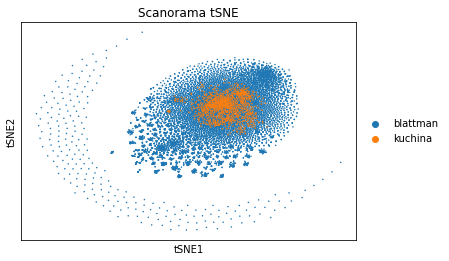

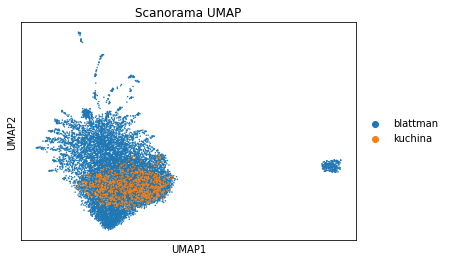

In [ ]:
sc.pl.tsne(scan_complete, color = 'batch', title="Scanorama tSNE")
sc.pl.umap(scan_complete, color = 'batch', title="Scanorama UMAP")

In [ ]:
prop = [scan_ecoli_blattman.obs['express'].values, scan_ecoli_kuchina.obs['heat_condition'].values]

In [ ]:
scan_complete.obs['properties'] = pd.DataFrame(np.concatenate(prop)).values

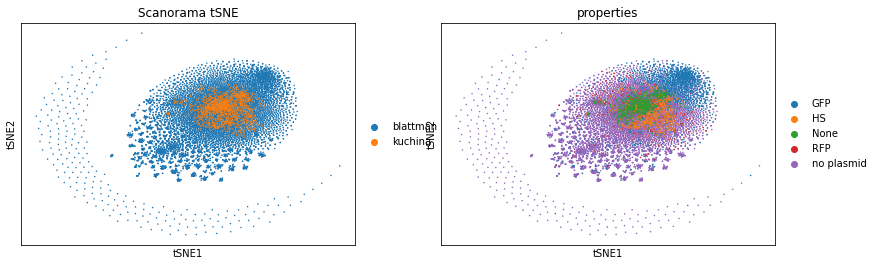

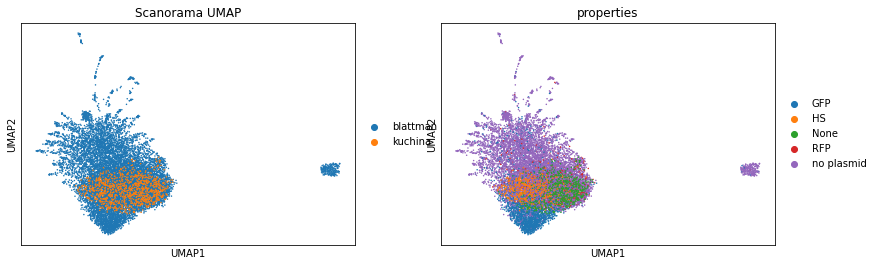

In [ ]:
sc.pl.tsne(scan_complete, color = ['batch','properties'], title="Scanorama tSNE")
sc.pl.umap(scan_complete, color = ['batch','properties'], title="Scanorama UMAP")

In [ ]:
sc.tl.leiden(scan_complete, resolution = 0.6)

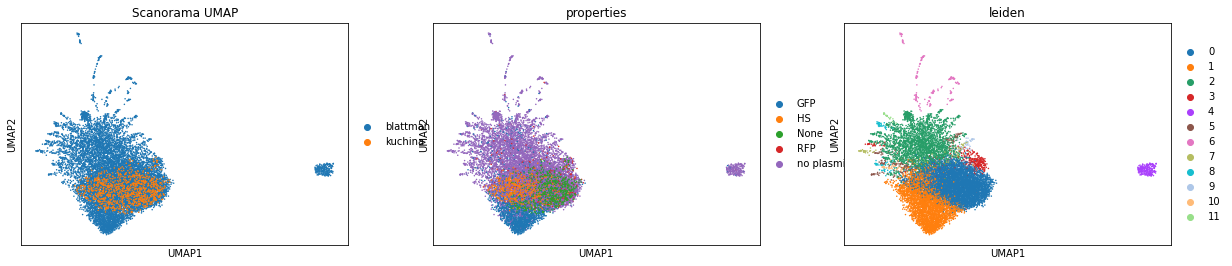

In [ ]:
sc.pl.umap(scan_complete, color = ['batch','properties','leiden'], title="Scanorama UMAP")

In [ ]:
sc.tl.diffmap(scan_complete)
sc.pp.neighbors(scan_complete, n_neighbors=20, use_rep='X_diffmap')

In [ ]:
sc.tl.draw_graph(scan_complete)

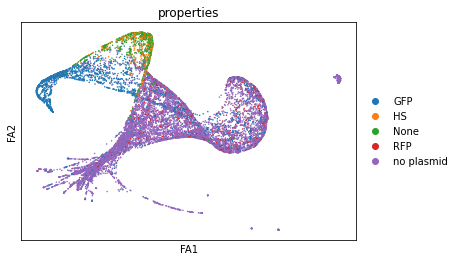

In [ ]:
sc.pl.draw_graph(scan_complete, color = 'properties')

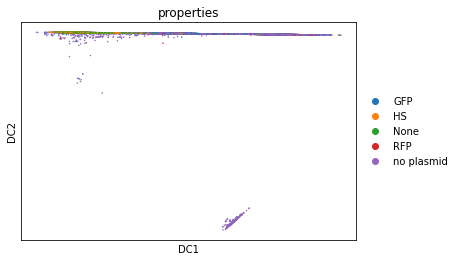

In [ ]:
sc.pl.diffmap(scan_complete, color = 'properties')

In [ ]:
scan_complete

AnnData object with n_obs × n_vars = 13318 × 100
    obs: 'cell_names', 'batch', 'properties', 'leiden'
    uns: 'neighbors', 'umap', 'tsne', 'batch_colors', 'properties_colors', 'leiden', 'leiden_colors', 'diffmap_evals', 'draw_graph'
    obsm: 'X_umap', 'X_tsne', 'X_diffmap', 'X_draw_graph_fa'
    obsp: 'distances', 'connectivities'

In [ ]:
sc.tl.paga(scan_complete, groups = 'leiden')

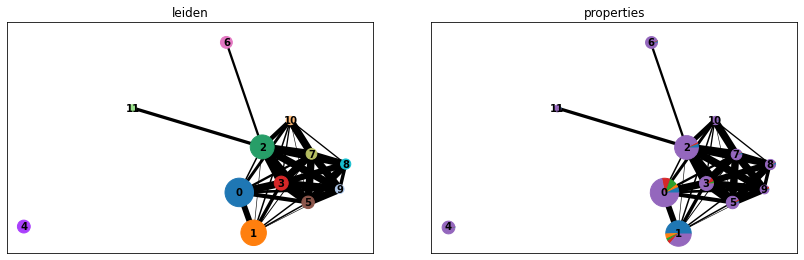

In [ ]:
sc.pl.paga(scan_complete, color = ['leiden', 'properties'])

# Scanorama using Scanpy External API

In [ ]:
concat_scan = ad.concat(adatas)

In [ ]:
uncorrected_scan = concat_scan.copy()

In [ ]:
uncorrected_scan

AnnData object with n_obs × n_vars = 13318 × 3721
    obs: 'batch', 'properties', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'tsne', 'batch_colors', 'properties_colors', 'leiden_colors', 'diffmap_evals', 'draw_graph', 'rank_genes_groups', 't-test', 't-test_ov', 'wilcoxon', 'logreg', 'dendrogram_leiden'
    obsm: 'X_scanorama', 'X_pca', 'X_scanorama_sc', 'X_umap', 'X_tsne', 'X_diffmap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

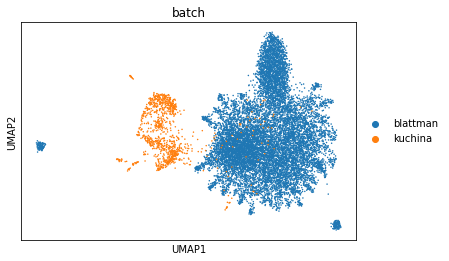

In [ ]:
sc.pp.neighbors(uncorrected_scan, use_rep = 'X_pca')
sc.tl.umap(uncorrected_scan)

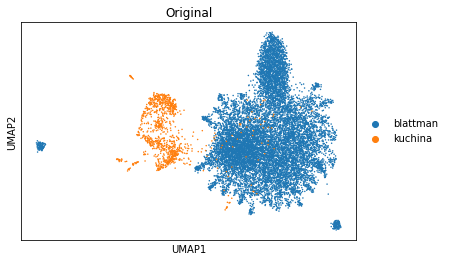

In [ ]:
sc.pl.umap(uncorrected_scan, color = 'batch', title = 'Original')

In [ ]:
#sc.pp.calculate_qc_metrics(concat_scan)

In [ ]:
sc.tl.pca(concat_scan)

In [ ]:
concat_scan

AnnData object with n_obs × n_vars = 13318 × 3721
    obs: 'batch'
    uns: 'pca'
    obsm: 'X_scanorama', 'X_pca'
    varm: 'PCs'

In [ ]:
sc.external.pp.scanorama_integrate(concat_scan, 'batch', adjusted_basis='X_scanorama_sc')

[[0.           0.6180620884]
 [0.           0.          ]]
Processing datasets blattman <=> kuchina


In [ ]:
sc.pp.neighbors(concat_scan, n_pcs = 50, use_rep ='X_scanorama_sc')
sc.tl.umap(concat_scan)

In [ ]:
concat_scan.obs['properties']= pd.DataFrame(np.concatenate(prop)).values

In [ ]:
sc.tl.leiden(concat_scan, resolution = 0.4)

In [ ]:
wishbone_scan = concat_scan.copy()

In [ ]:
sc.tl.tsne(concat_scan, use_rep = 'X_scanorama_sc')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


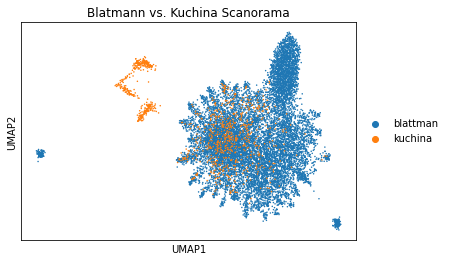

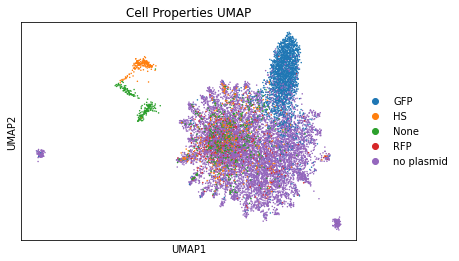

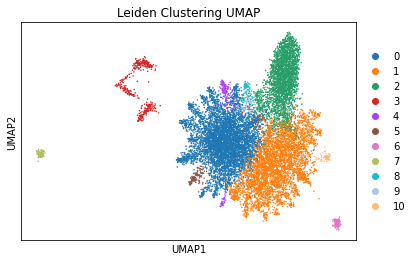

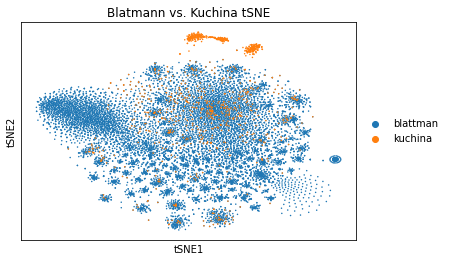

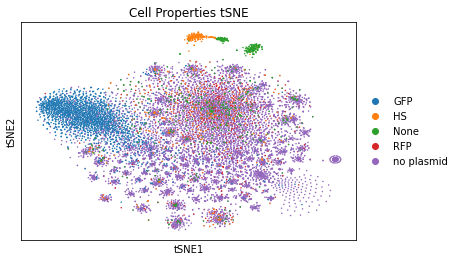

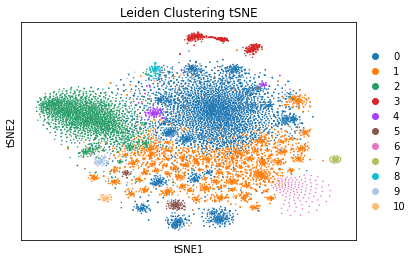

In [ ]:
sc.pl.umap(concat_scan,color = 'batch', title = 'Blatmann vs. Kuchina Scanorama')
sc.pl.umap(concat_scan,color = 'properties', title = 'Cell Properties UMAP')
sc.pl.umap(concat_scan,color = 'leiden', title = 'Leiden Clustering UMAP')
sc.pl.tsne(concat_scan,color = 'batch', title = 'Blatmann vs. Kuchina tSNE')
sc.pl.tsne(concat_scan,color = 'properties', title = 'Cell Properties tSNE')
sc.pl.tsne(concat_scan,color = 'leiden', title = 'Leiden Clustering tSNE')

# Branching Trajectories and Pseudotime Analysis for Scanorama

In [ ]:
sc.tl.diffmap(concat_scan)
sc.pp.neighbors(concat_scan, n_neighbors=20, use_rep='X_diffmap')

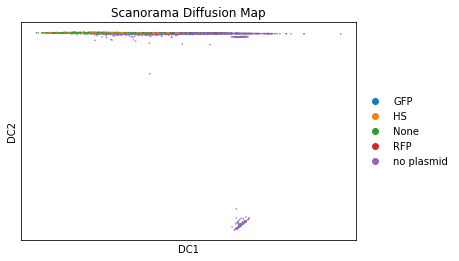

In [ ]:
sc.pl.diffmap(concat_scan, color = 'properties', title = 'Scanorama Diffusion Map')

In [ ]:
sc.tl.draw_graph(concat_scan)

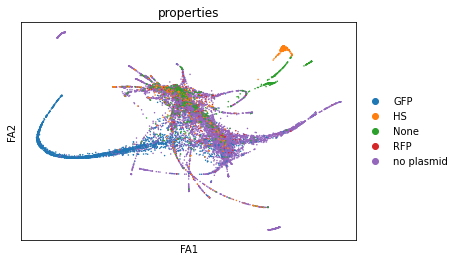

In [ ]:
sc.pl.draw_graph(concat_scan, color = 'properties')

In [ ]:
id = dense2.obs[:]['n_genes_by_counts'].idxmax()

In [ ]:
concat_scan[id]

View of AnnData object with n_obs × n_vars = 1 × 3721
    obs: 'batch', 'properties', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'tsne', 'batch_colors', 'properties_colors', 'leiden_colors', 'diffmap_evals', 'draw_graph'
    obsm: 'X_scanorama', 'X_pca', 'X_scanorama_sc', 'X_umap', 'X_tsne', 'X_diffmap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
#concat_scan.uns['iroot'] = id.values

In [ ]:
wishbone_scan
sc.tl.diffmap(wishbone_scan, n_comps = 10)

In [ ]:
#dpt_scan = sc.tl.dpt(concat_scan, copy = True)

In [ ]:
import scanpy.external as sce

sce.tl.wishbone(adata=wishbone_scan, start_cell='394A_bc1_45_bc2_41_bc3_84_RFP_12773', components=[2, 3], num_waypoints=150, branch=True)

Building lNN graph...
lNN computed in : 0.06 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
......................................................................................................................................................
Time for determining distances and perspectives: 110.11 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  1.0000
1 realignment iterations


In [ ]:
wishbone_scan.obs['leiden'] = concat_scan.obs['leiden']

In [ ]:
wishbone_scan.write(filename = 'wishbone_scanorama')

TypeError: ignored

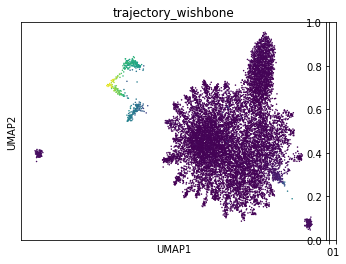

In [ ]:
sc.pl.umap(wishbone_scan, color = 'trajectory_wishbone')
sc.pl.umap(wishbone_scan, color = 'branch_wishbone')

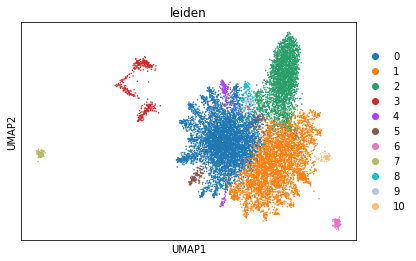

In [ ]:
sc.pl.umap(wishbone_scan, color = 'leiden')

In [ ]:
wishbone_scan

In [ ]:
sc.tl.paga(wishbone_scan, groups = 'leiden')

In [ ]:
sc.pl.paga(wishbone_scan)

# Differential Gene Expression Analysis using scPrep

In [ ]:
scprep.stats.differential_expression_by_cluster(wishbone_scan.X, wishbone_scan.obs['leiden'],gene_names = wishbone_scan.var_names)

{'0':            difference  rank
 oppABCDF     0.498211     0
 znuA         0.424016     1
 adhE         0.413005     2
 icd          0.409685     3
 gatYZABCD    0.409236     4
 ...               ...   ...
 borD         0.000014  3716
 sapC         0.000012  3717
 tsaB        -0.000012  3718
 frlC        -0.000009  3719
 fucK        -0.000006  3720
 
 [3721 rows x 2 columns],
 '1':                                              difference  rank
 pdhR-aceEF-lpd                                -0.437947     0
 rplNXE-rpsNH-rplFR-rpsE-rpmD-rplO-secY-rpmJ   -0.433512     1
 rpsJ-rplCDWB-rpsS-rplV-rpsC-rplP-rpmC-rpsQ    -0.405177     2
 rplKAJL-rpoBC                                 -0.403775     3
 rRNA                                           0.384267     4
 ...                                                 ...   ...
 dinJ                                          -0.000006  3716
 ydgI                                           0.000004  3717
 ibsD                                          

In [ ]:
sc.tl.rank_genes_groups(concat_scan,'properties',method = 'wilcoxon')

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


In [ ]:
concat_scan

AnnData object with n_obs × n_vars = 13318 × 3721
    obs: 'batch', 'properties', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'tsne', 'batch_colors', 'properties_colors', 'leiden_colors', 'diffmap_evals', 'draw_graph', 'rank_genes_groups'
    obsm: 'X_scanorama', 'X_pca', 'X_scanorama_sc', 'X_umap', 'X_tsne', 'X_diffmap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


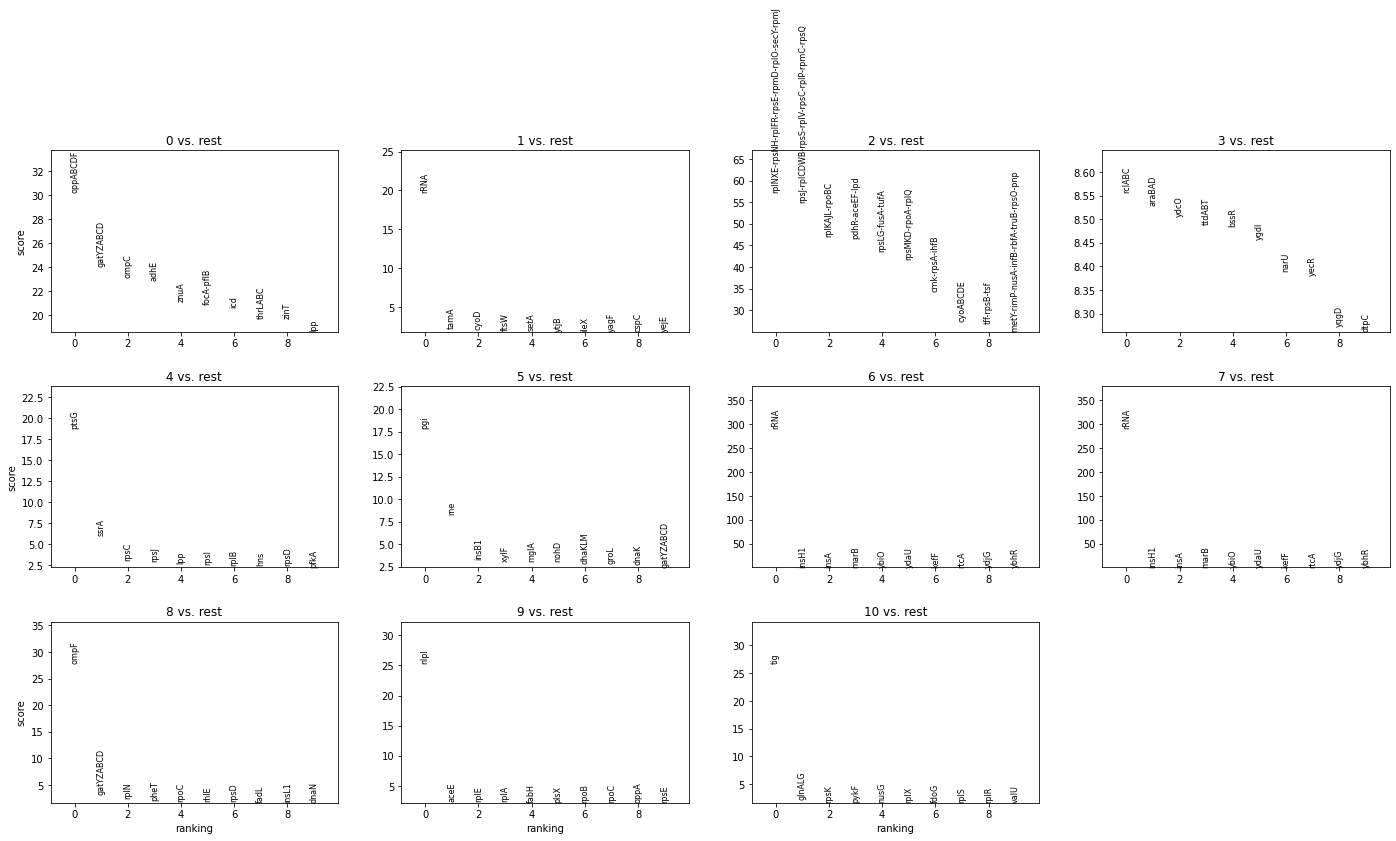

In [ ]:
sc.tl.rank_genes_groups(concat_scan, 'leiden', method = 't-test', key_added = 't-test')
sc.pl.rank_genes_groups(concat_scan, n_genes=10, sharey=False, key = "t-test")

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


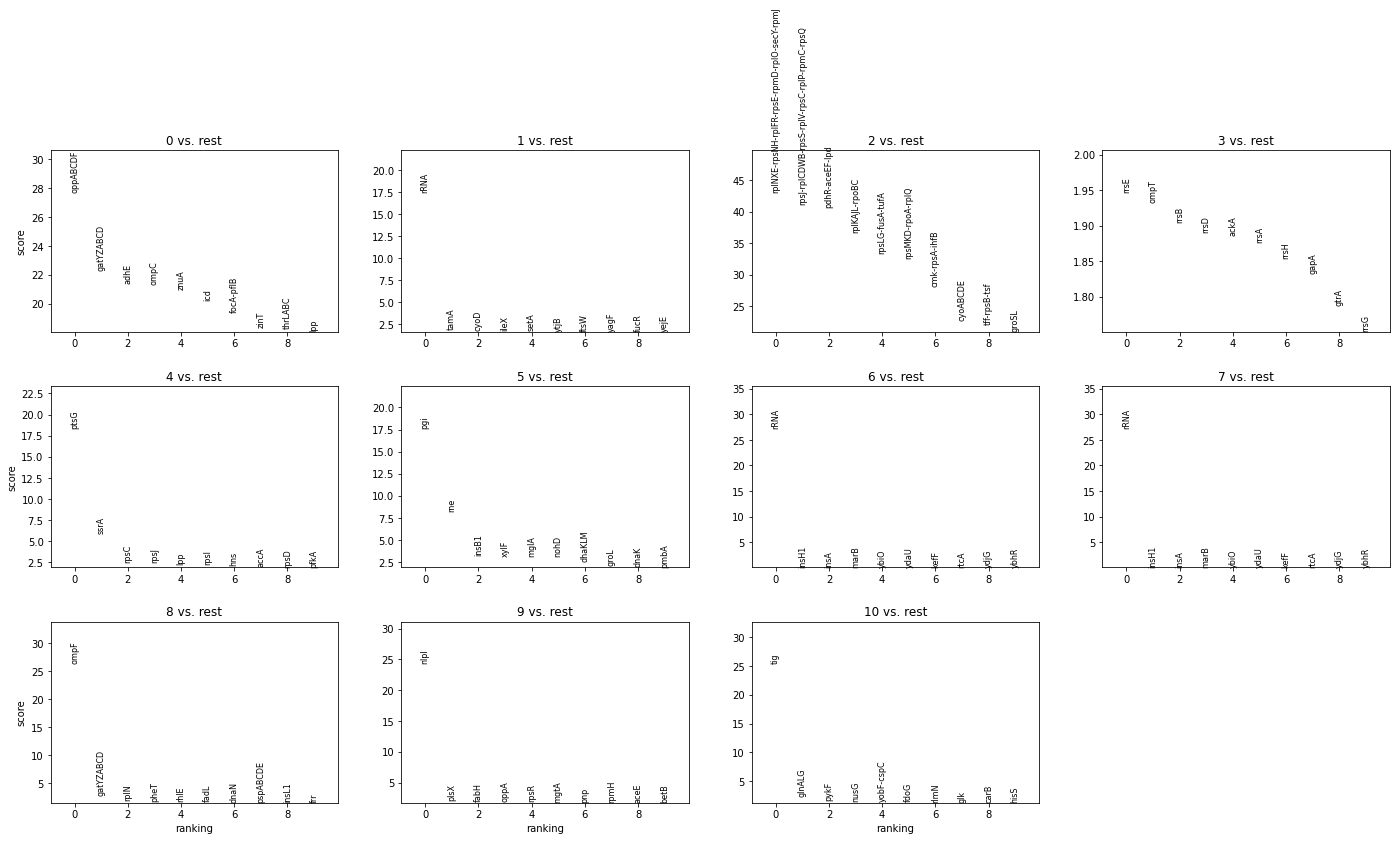

In [ ]:
sc.tl.rank_genes_groups(concat_scan, 'leiden', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(concat_scan, n_genes=10, sharey=False, key = "t-test_ov")

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/plotting/_tools/__init__.py:397: UserWarning: Attempting to set identical bottom == top == 32.254764556884766 results in singular transformations; automatically expanding.
  for ig, gene_name in enumerate(gene_names):


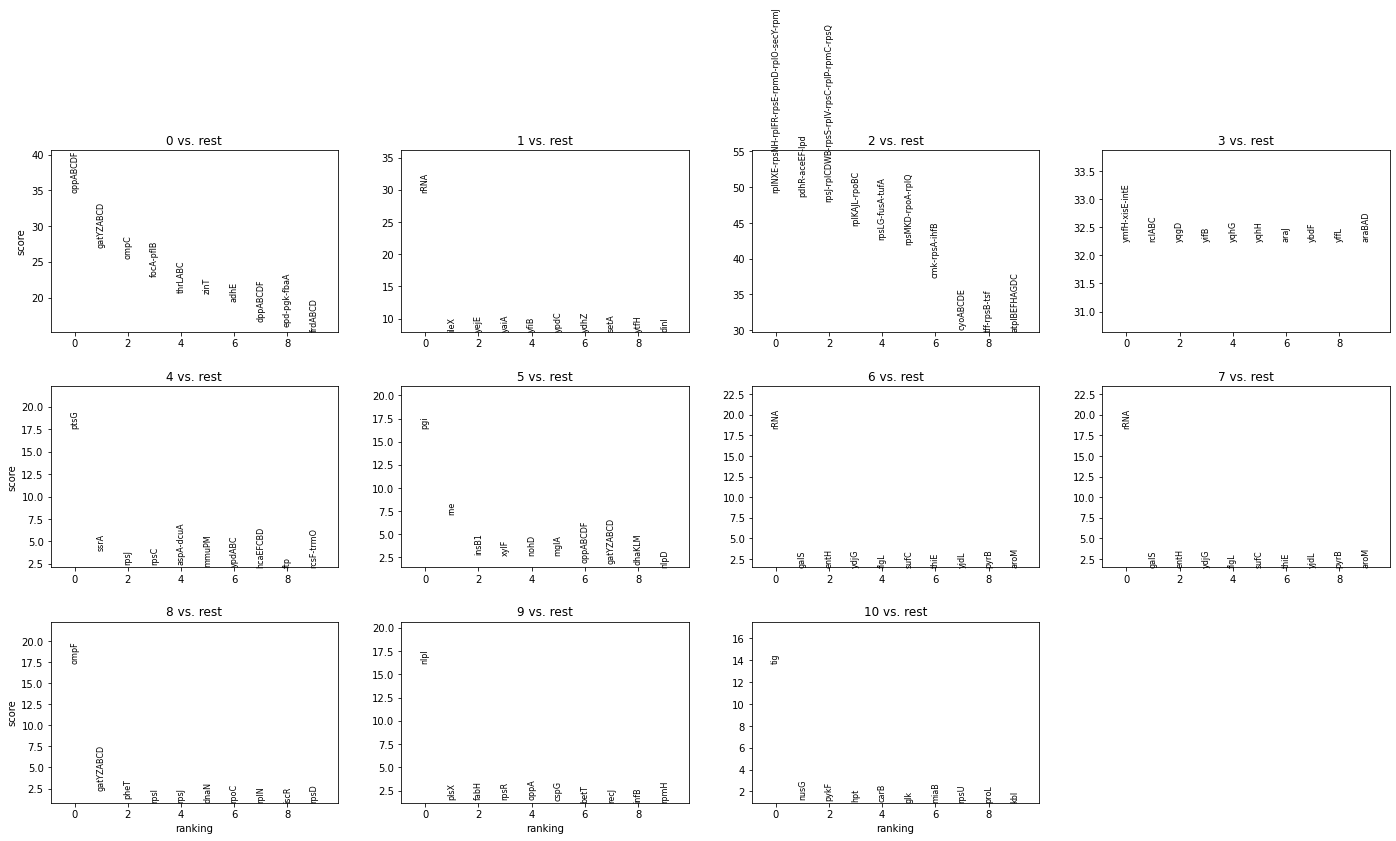

In [ ]:
sc.tl.rank_genes_groups(concat_scan, 'leiden', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(concat_scan, n_genes=10, sharey=False, key="wilcoxon")

In [ ]:
sc.tl.rank_genes_groups(concat_scan, 'leiden', method='logreg',key_added = "logreg")
sc.pl.rank_genes_groups(concat_scan, n_genes=10, sharey=False, key = "logreg")

KeyboardInterrupt: ignored

In [ ]:
concat_scan

In [ ]:
#compare cluster1 genes, only stores top 100 by default

wc = sc.get.rank_genes_groups_df(concat_scan, group='0', key='wilcoxon', pval_cutoff=0.01, log2fc_min=0)['names']
tt = sc.get.rank_genes_groups_df(concat_scan, group='0', key='t-test', pval_cutoff=0.01, log2fc_min=0)['names']
tt_ov = sc.get.rank_genes_groups_df(concat_scan, group='0', key='t-test_ov', pval_cutoff=0.01, log2fc_min=0)['names']

from matplotlib_venn import venn3

venn3([set(wc),set(tt),set(tt_ov)], ('Wilcox','T-test','T-test_ov') )
plt.show()

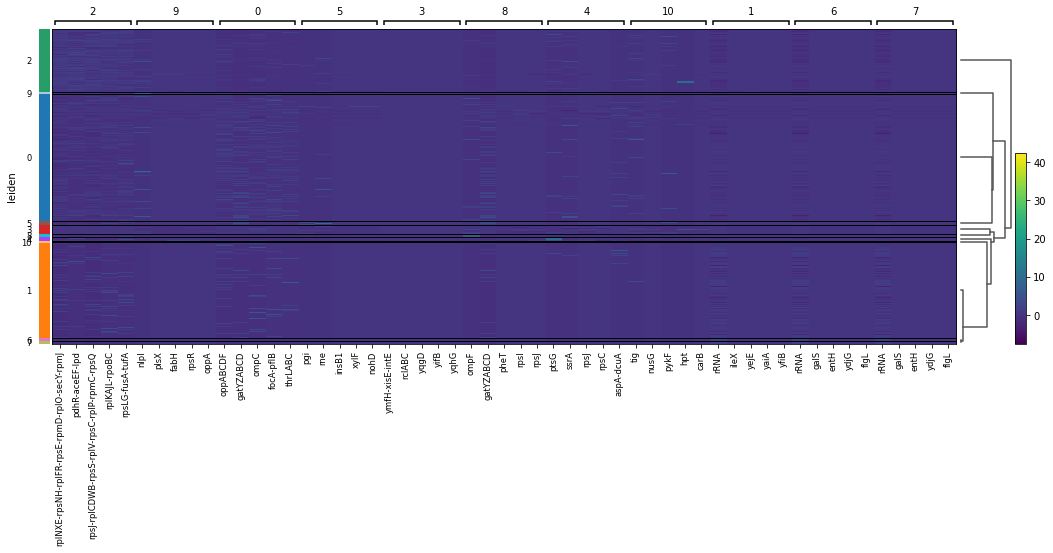

In [ ]:
sc.tl.dendrogram(concat_scan, groupby = 'leiden')
sc.pl.rank_genes_groups_heatmap(concat_scan, n_genes=5, key="wilcoxon", groupby="leiden", show_gene_labels=True)

In [ ]:
sc.pl.rank_genes_groups_dotplot(concat_scan, n_genes=5, key="t-test", groupby= "properties")

NameError: ignored

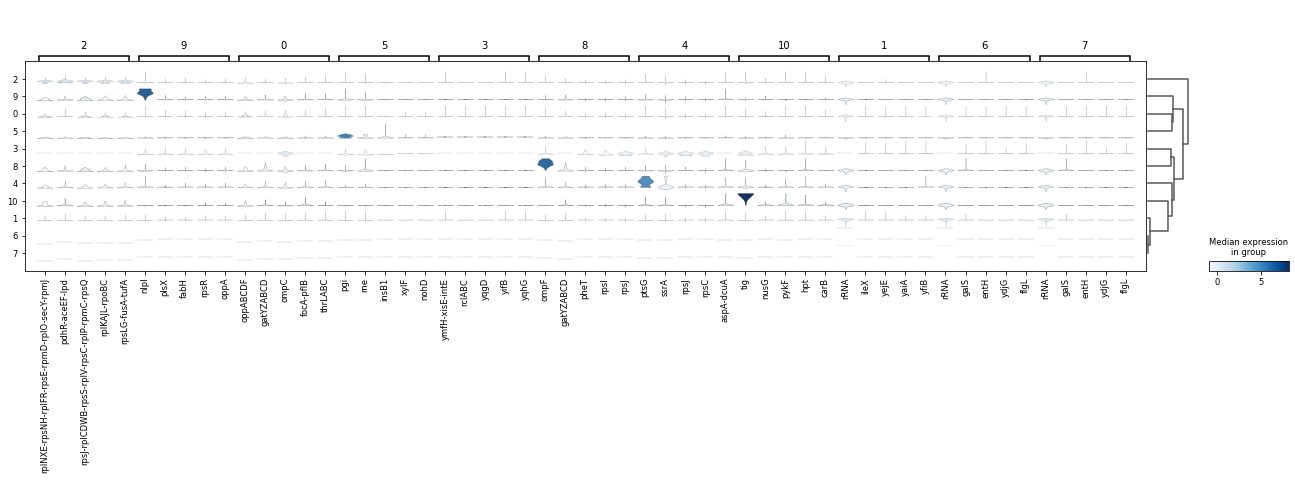

In [ ]:
sc.pl.rank_genes_groups_stacked_violin(concat_scan, n_genes=5, key="wilcoxon", groupby="leiden")

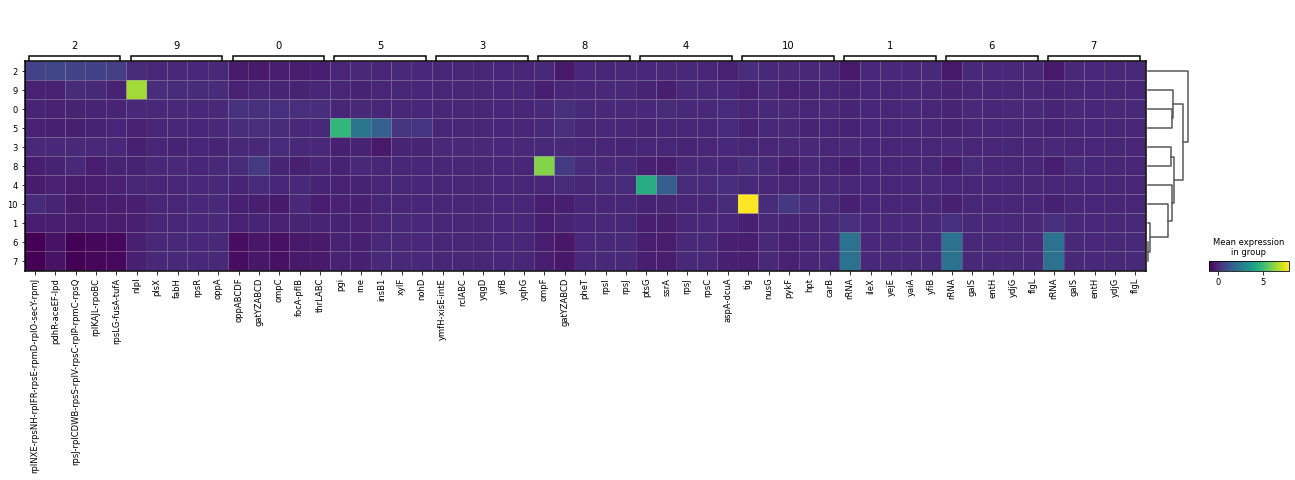

In [ ]:
sc.pl.rank_genes_groups_matrixplot(concat_scan, n_genes=5, key="wilcoxon", groupby="leiden")

# Wishbone Visualiation and Marker Trajectories

In [ ]:
wishbone_scan = ad.read_h5ad(filename = 'wishbone_scanorama')

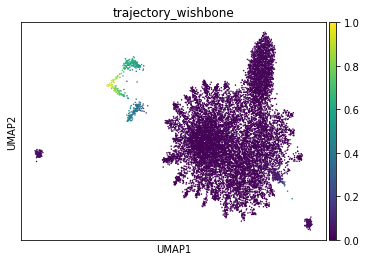

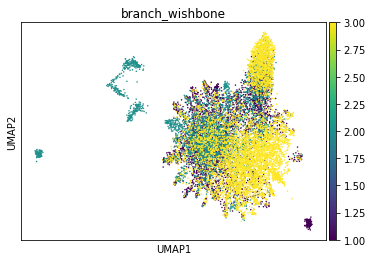

In [ ]:
sc.pl.umap(wishbone_scan, color = 'trajectory_wishbone')
sc.pl.umap(wishbone_scan, color = 'branch_wishbone')

In [ ]:
!pip install Phenograph

In [ ]:
wishbone_scan

AnnData object with n_obs × n_vars = 13318 × 3721
    obs: 'batch', 'properties', 'leiden', 'trajectory_wishbone', 'branch_wishbone'
    uns: 'diffmap_evals', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'trunk_wishbone', 'branch1_wishbone', 'branch2_wishbone'
    obsm: 'X_diffmap', 'X_pca', 'X_scanorama', 'X_scanorama_sc', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

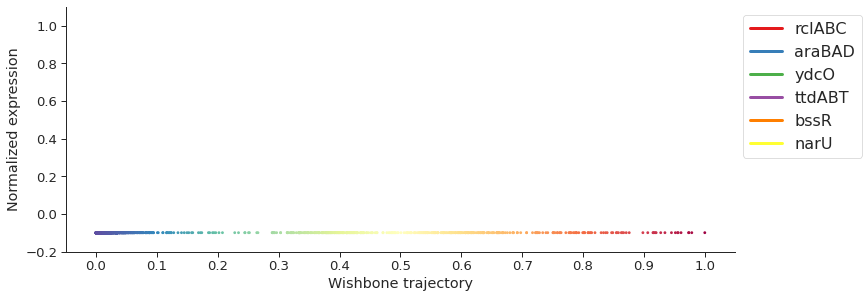

In [ ]:
markers = ['rclABC','araBAD', 'ydcO','ttdABT','bssR','narU']
sce.pl.wishbone_marker_trajectory(wishbone_scan, markers, show=True)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 5.952958345413208 seconds
Jaccard graph constructed in 9.412056684494019 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 15.62822437286377 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


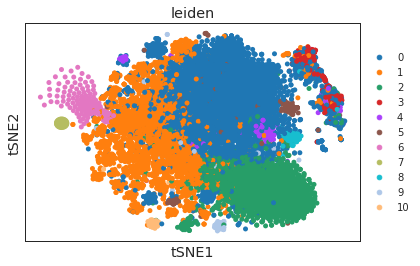

In [ ]:
sce.tl.phenograph(wishbone_scan, clustering_algo=None, k=50)
sc.tl.tsne(wishbone_scan, random_state=1)
sc.pl.tsne(
    wishbone_scan, color=['leiden'], s=100,
    palette=sc.pl.palettes.vega_20_scanpy, legend_fontsize=10
)

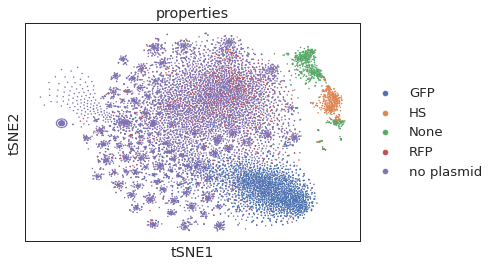

In [ ]:
sc.pl.tsne(wishbone_scan, color = 'properties')